In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2



# Load your pre-trained model
model = tf.keras.models.load_model('ForestFire_c_Model.h5')


In [23]:
image_path = r'C:\Users\User\testfire1.png'
#image_path = r'C:\Users\User\normal1.jpg'
img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

predictions = model.predict(img, verbose=0)
print(predictions)

probability_fire = predictions[0][0] *100
probability_normal = predictions[0][1] *100

print("fire probability = ",probability_fire)
print("normal probablity = ",probability_normal)


if probability_normal > 0.5:
    classification = "normal"
else:
    classification = "fire"

print(f"Class: {classification}")


[[1.000000e+00 1.021416e-09]]
fire probability =  100.0
normal probablity =  1.0214159518184829e-07
Class: fire


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


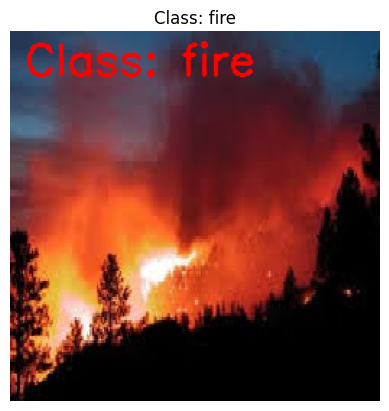

In [24]:
import cv2
import matplotlib.pyplot as plt
cv2.putText(img[0], f'Class: {classification}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
plt.title(f'Class: {classification}')
plt.imshow(img[0])
plt.axis('off')
plt.show()


In [25]:
# Define video capture
input_video_path = 'normal_fire.mp4' 
#input_video_path = 'normal2.mp4'
#input_video_path = 'fire1.mp4'
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
output_video_path = r'C:\Users\User\result.avi'  

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [26]:
from tqdm import tqdm 

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
progress_bar = tqdm(total=total_frames, position=0, leave=True, desc="Processing Frames")

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame_resized = cv2.resize(frame, (256, 256))
    frame_resized = image.img_to_array(frame_resized)
    frame_resized = np.expand_dims(frame_resized, axis=0)
    frame_resized = frame_resized / 255.0

    predictions = model.predict(frame_resized, verbose=0)

    probability_fire = predictions[0][0]
    probability_normal = predictions[0][1]

    if probability_normal > 0.5:
        classification = "normal"
    else:
        classification = "fire"

    cv2.putText(frame, f'Class: {classification}', (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4)

    out.write(frame)

    progress_bar.update(1)

cap.release()
out.release()

progress_bar.close()

print("Video processing complete")


Processing Frames: 100%|█████████████████████████████████████████████████████████████| 244/244 [00:53<00:00,  4.52it/s]

Video processing complete
